In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from weibull_model_football_scores.probs.weibull import weibull_likelihood

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
from weibull_model_football_scores.ingestion import load_data, load_prediction_dataset
from weibull_model_football_scores.model import WeibullCountFitter

from sklearn.metrics import precision_recall_fscore_support

In [5]:
df = load_data(league="seriea", season="22_23")

In [6]:
train = df[df["fixture"] < df["fixture"].max() - 3].copy()
test = df[df["fixture"] >= df["fixture"].max() - 3].copy()

In [22]:
w = WeibullCountFitter()

In [23]:
w.fit(train, learning_rate=0.01, test=test)

Starting train likelihood: -667.8159301541198
Starting test likelihood: -115.89006765185134
Step 1, current likelihood: -636.0969132529518
Step 1, current test likelihood: -115.03133705205339
Step 2, current likelihood: -622.2901055563849
Step 2, current test likelihood: -115.40617596133222
Step 3, current likelihood: -616.3563567554392
Step 3, current test likelihood: -115.92674816825118
Step 4, current likelihood: -613.5459654807809
Step 4, current test likelihood: -116.31993343535939
Step 5, current likelihood: -612.0651866447795
Step 5, current test likelihood: -116.59489582799583
Step 6, current likelihood: -611.2238165836397
Step 6, current test likelihood: -116.79208627835413
Step 7, current likelihood: -610.7195958571871
Step 7, current test likelihood: -116.93868455685434
Step 8, current likelihood: -610.404894834835
Step 8, current test likelihood: -117.0511014676527
Step 9, current likelihood: -610.2020265233286
Step 9, current test likelihood: -117.13963543179118
Step 10, c

In [25]:
import numpy as np

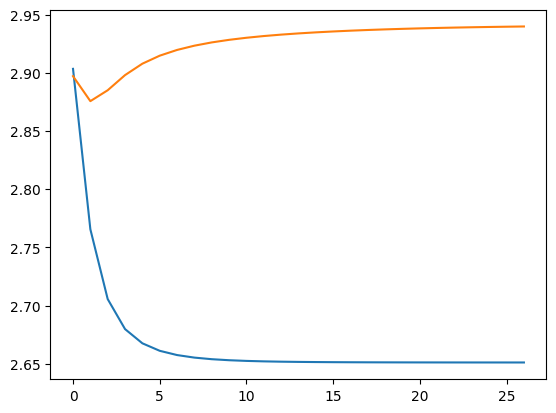

In [26]:
# Likelihood per observation
plt.plot(-np.array(w.train_likelihoods)/len(train))
plt.plot(-np.array(w.test_likelihoods)/len(test))

In [ ]:
w.C_team.sort_values("alpha", ascending=False)

In [ ]:
w.C_team.sort_values("beta", ascending=True)

In [ ]:
_test = test.copy()

In [ ]:
test = test[test["fixture"] == test["fixture"].min()]

In [ ]:
TRAIN = train.join(w.predict_under_over(train))
TEST = test.join(w.predict_under_over(test))

In [ ]:
TRAIN["over_true"] = TRAIN["FTHG"] + TRAIN["FTAG"] > 2.5
TRAIN["over_pred"] = TRAIN["over"] > TRAIN["under"] 


TEST["over_true"] = TEST["FTHG"] + TEST["FTAG"] > 2.5
TEST["over_pred"] = TEST["over"] > TEST["under"] 

In [ ]:
Z = T[T[["under", "over"]].max(axis=1) > 0.7]

In [ ]:
precision_recall_fscore_support(TRAIN["over_true"], TRAIN["over_pred"])

In [ ]:
precision_recall_fscore_support(TEST["over_true"], TEST["over_pred"])

In [ ]:
TEST

In [ ]:
Z

In [ ]:
precision_recall_fscore_support(Z["over_true"], Z["over_pred"])

In [ ]:
1/w.predict_1x2_single_match("Napoli", "Milan")

In [ ]:
1/(1 - (1/1.75 + 1/3.65))

In [ ]:
#cProfile.run('w.fit(df, n_iter=4)')

In [ ]:
X = load_prediction_dataset(league="seriea", season="22_23")

In [ ]:
preds = w.predict(X, how="under_over")

In [ ]:
X.join(preds)